In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import numpy as np
from datetime import timedelta
import seaborn as sns

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Load Data

In [38]:
train_df = pd.read_csv('/dataset/application_train.csv')
test_df= pd.read_csv('/dataset/application_test.csv')
bureau_df = pd.read_csv('/dataset/bureau.csv')
bureau_bal_df = pd.read_csv('/dataset/bureau_balance.csv')
pos_cash_bal_df= pd.read_csv('/dataset/POS_CASH_balance.csv')
cr_card_bal_df = pd.read_csv('/dataset/credit_card_balance.csv')
prev_app_df = pd.read_csv('/dataset/previous_application.csv')
installments_pay_df = pd.read_csv('/dataset/installments_payments.csv')

In [39]:
print('------------main------------')
print('application_train:', train_df.shape[0], "rows and", train_df.shape[1],'columns')
print('application_test:', test_df.shape[0], "rows and", test_df.shape[1],'columns')
print('      ')
print('------------others------------')
print('POS_CASH_balance:', pos_cash_bal_df.shape[0], "rows and", pos_cash_bal_df.shape[1],'columns')
print('bureau:', bureau_df.shape[0], "rows and", bureau_df.shape[1],'columns')
print('bureau_balance:', bureau_bal_df.shape[0], "rows and", bureau_bal_df.shape[1],'columns')
print('previous_application:', prev_app_df.shape[0], "rows and", prev_app_df.shape[1],'columns')
print('installments_payments:', installments_pay_df.shape[0], "rows and", installments_pay_df.shape[1],'columns')
print('credit_card_balance:', cr_card_bal_df.shape[0], "rows and", cr_card_bal_df.shape[1],'columns')


------------main------------
application_train: 307511 rows and 122 columns
application_test: 48744 rows and 121 columns
      
------------others------------
POS_CASH_balance: 10001358 rows and 8 columns
bureau: 1716428 rows and 17 columns
bureau_balance: 27299925 rows and 3 columns
previous_application: 1670214 rows and 37 columns
installments_payments: 13605401 rows and 8 columns
credit_card_balance: 3840312 rows and 23 columns


# Check Data - Find missing values etc

In [40]:
def find_missing_entry(data):
  '''
  This function finds number and percentage of missing values in the dataframes
  -----------------------------------------------------------------------------
  data: input dataframe
  return: dataframe with count and percentage of missing values
  '''

  count_missing = data.isnull().sum().values
  total = data.shape[0]
  ratio_missing = count_missing/total
  # return a dataframe to show: feature name, # of missing and % of missing
  return pd.DataFrame(data={'missing_count':count_missing, 'missing_ratio':ratio_missing}, index=data.columns.values)

find_missing_entry(train_df).sort_values(by='missing_count', ascending=False).head(12)

,missing_count,missing_ratio
COMMONAREA_MEDI,214865,0.698723
COMMONAREA_AVG,214865,0.698723
COMMONAREA_MODE,214865,0.698723
NONLIVINGAPARTMENTS_MODE,213514,0.694330
NONLIVINGAPARTMENTS_AVG,213514,0.694330
NONLIVINGAPARTMENTS_MEDI,213514,0.694330
FONDKAPREMONT_MODE,210295,0.683862
LIVINGAPARTMENTS_MODE,210199,0.683550
LIVINGAPARTMENTS_AVG,210199,0.683550
LIVINGAPARTMENTS_MEDI,210199,0.683550


In [41]:
find_missing_entry(pos_cash_bal_df).sort_values(by='missing_count', ascending=False).head()

,missing_count,missing_ratio
CNT_INSTALMENT_FUTURE,26087,0.002608
CNT_INSTALMENT,26071,0.002607
SK_ID_PREV,0,0.000000
SK_ID_CURR,0,0.000000
MONTHS_BALANCE,0,0.000000


In [42]:
find_missing_entry(bureau_df).sort_values(by='missing_count', ascending=False).head()

,missing_count,missing_ratio
AMT_ANNUITY,1226791,0.714735
AMT_CREDIT_MAX_OVERDUE,1124488,0.655133
DAYS_ENDDATE_FACT,633653,0.369170
AMT_CREDIT_SUM_LIMIT,591780,0.344774
AMT_CREDIT_SUM_DEBT,257669,0.150119


In [43]:
find_missing_entry(bureau_bal_df).head(12)

,missing_count,missing_ratio
SK_ID_BUREAU,0,0.0
MONTHS_BALANCE,0,0.0
STATUS,0,0.0


In [44]:
find_missing_entry(cr_card_bal_df).sort_values(by='missing_count', ascending=False).head(10)

,missing_count,missing_ratio
AMT_PAYMENT_CURRENT,767988,0.199981
AMT_DRAWINGS_ATM_CURRENT,749816,0.195249
CNT_DRAWINGS_POS_CURRENT,749816,0.195249
AMT_DRAWINGS_OTHER_CURRENT,749816,0.195249
AMT_DRAWINGS_POS_CURRENT,749816,0.195249
CNT_DRAWINGS_OTHER_CURRENT,749816,0.195249
CNT_DRAWINGS_ATM_CURRENT,749816,0.195249
CNT_INSTALMENT_MATURE_CUM,305236,0.079482
AMT_INST_MIN_REGULARITY,305236,0.079482
SK_ID_PREV,0,0.000000


# Data Exploration

# Categorical features

In [45]:
def plot_categorical(data, col, size=[8 ,4], xlabel_angle=0, title='', xtick=['Good', 'Default']):
    '''
    This function plots the count of categorical features
    '''
    plotdata = data[col].value_counts() / len(data)
    plt.figure(figsize = size)
    sns.barplot(x = plotdata.index, y=plotdata.values)
    # plt.xlabel(col)
    plt.title(title)
    if xlabel_angle!=0: 
        plt.xticks(rotation=xlabel_angle)
    plt.show()

# How is the distribution of labels?

According to description of the data -1 indicates client with payment difficulties, 0 indicates all other cases.

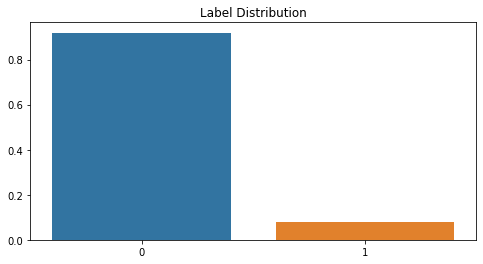

In [46]:
plot_categorical(train_df, 'TARGET', xlabel_angle=0, title='Label Distribution')

Very clearly the target labels are imbalanced

# Who are major borrowers? What are their occupation?

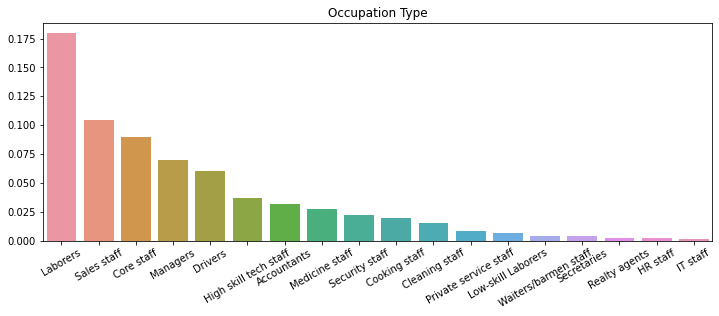

In [47]:
plot_categorical(data=train_df, col='OCCUPATION_TYPE', size=[12 ,4], xlabel_angle=30, title='Occupation Type')

From the plot we can see Labourers are major borrower and least number of clients are IT staffs.

# What are the income types of the borrowers?

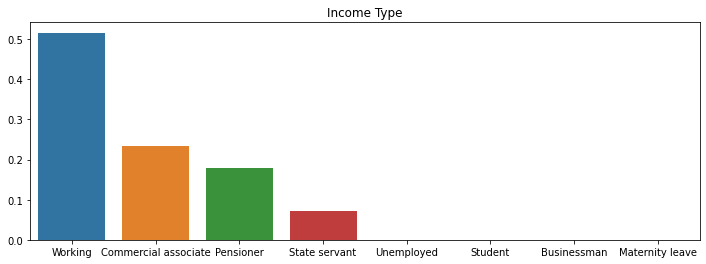

In [48]:
plot_categorical(data=train_df, col='NAME_INCOME_TYPE', size=[12 ,4], xlabel_angle=0, title='Income Type')

# What are the living situation of the borrowers?

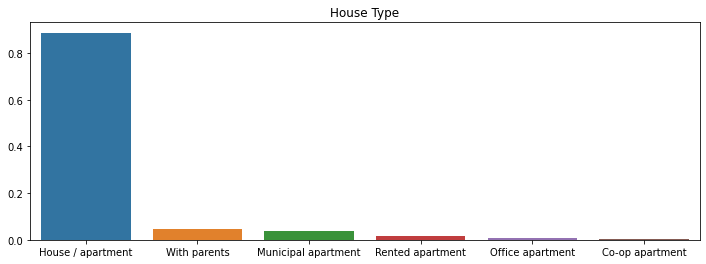

In [49]:
plot_categorical(data=train_df, col='NAME_HOUSING_TYPE', size=[12 ,4], xlabel_angle=0, title='House Type')

# Numerical Freatures

In [50]:
def plot_numerical(data, col, size=[8, 4], bins=50):
    '''use this for ploting the distribution of numercial features'''
    plt.figure(figsize=size)
    plt.title("Distribution of %s" % col)
    sns.distplot(data[col].dropna(), kde=True,bins=bins)
    plt.show()

# How is the distribution of Credit Amaount?

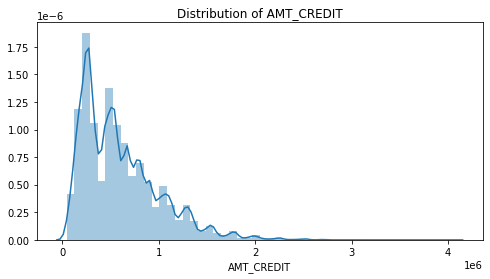

In [51]:
plot_numerical(train_df, 'AMT_CREDIT')

The distribution looks like a right skewed normal distribution

# How is the distribution of Annuity Amount?

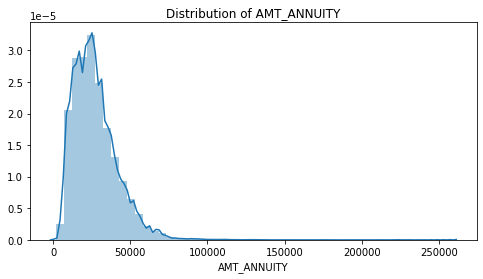

In [52]:
plot_numerical(train_df, 'AMT_ANNUITY')

This distribution also looks like a right-skewed normal distribution. Most of the Annuity Amount is in between 0-50000

# How is the distribution of number of employment days?

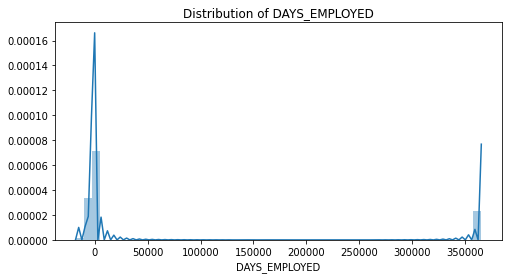

In [53]:
plot_numerical(train_df, 'DAYS_EMPLOYED')

From the data distribution we notice that the there are two peaks in the distribution, one near zero value and one when it's more that 350000. Most of the clients are with n employment.

# Categorical features by Label (0/1)

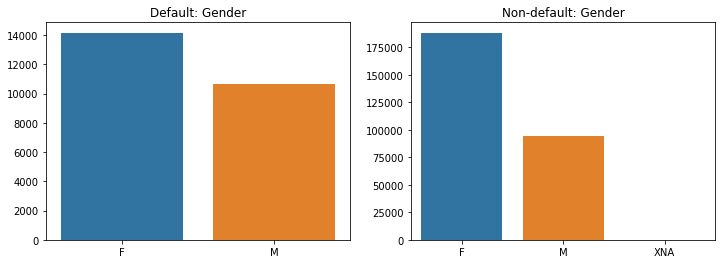

In [54]:
def plot_cat_bylabel(data, col, size=[12 ,4], xlabel_angle=0, title=''):
    '''use it to compare the distribution between label 1 and label 0'''
    plt.figure(figsize = size)
    l1 = data.loc[data.TARGET==1, col].value_counts()
    l0 = data.loc[data.TARGET==0, col].value_counts()
    plt.subplot(1,2,1)
    sns.barplot(x = l1.index, y=l1.values)
    plt.title('Default: '+title)
    plt.xticks(rotation=xlabel_angle)
    plt.subplot(1,2,2)
    sns.barplot(x = l0.index, y=l0.values)
    plt.title('Non-default: '+title)
    plt.xticks(rotation=xlabel_angle)
    plt.show()


plot_cat_bylabel(train_df, 'CODE_GENDER', title='Gender')

Females have relatively more difficulties in repaying the loan back (as we see in target label 1)

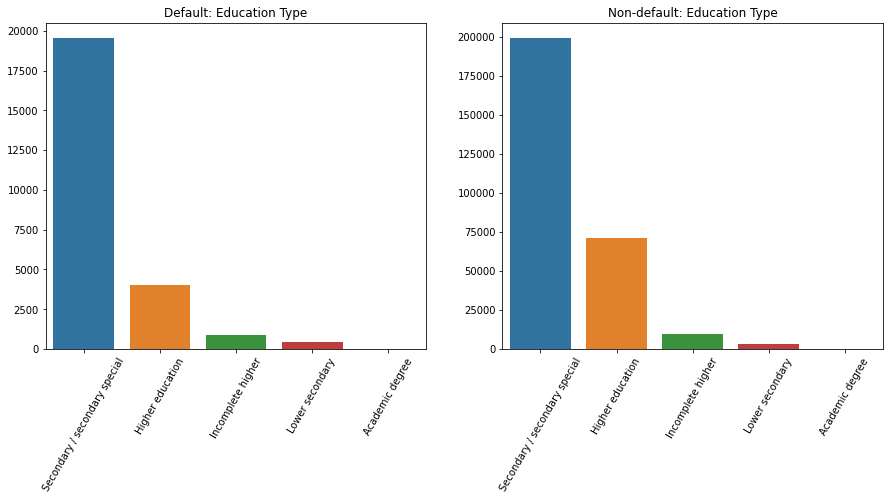

In [55]:
plot_cat_bylabel(train_df, 'NAME_EDUCATION_TYPE', size=[15 ,6], xlabel_angle=60, title='Education Type')

# Data preprocessing
- Finding missing values

In [56]:
def missing_columns(dataframe):
    """
    Returns a dataframe that contains missing column names and 
    percent of missing values in relation to the whole dataframe.
    
    dataframe: dataframe that gives the column names and their % of missing values
    """
    
    # find the missing values
    missing_values = dataframe.isnull().sum().sort_values(ascending=False)
    
    # percentage of missing values in relation to the overall size
    missing_values_pct = 100 * missing_values/len(dataframe)
    
    # create a new dataframe which is a concatinated version
    concat_values = pd.concat([missing_values, missing_values/len(dataframe),missing_values_pct.round(1)],axis=1)

    # give new col names
    concat_values.columns = ['Missing Count','Missing Count Ratio','Missing Count %']
    
    # return the required values
    return concat_values[concat_values.iloc[:,1]!=0]

In [57]:
missing_columns(train_df)

,Missing Count,Missing Count Ratio,Missing Count %
COMMONAREA_MEDI,214865,0.698723,69.9
COMMONAREA_AVG,214865,0.698723,69.9
COMMONAREA_MODE,214865,0.698723,69.9
NONLIVINGAPARTMENTS_MODE,213514,0.694330,69.4
NONLIVINGAPARTMENTS_MEDI,213514,0.694330,69.4
...,...,...,...
EXT_SOURCE_2,660,0.002146,0.2
AMT_GOODS_PRICE,278,0.000904,0.1
AMT_ANNUITY,12,0.000039,0.0
CNT_FAM_MEMBERS,2,0.000007,0.0


In [58]:
missing_columns(test_df)

,Missing Count,Missing Count Ratio,Missing Count %
COMMONAREA_MEDI,33495,0.687161,68.7
COMMONAREA_AVG,33495,0.687161,68.7
COMMONAREA_MODE,33495,0.687161,68.7
NONLIVINGAPARTMENTS_MODE,33347,0.684125,68.4
NONLIVINGAPARTMENTS_MEDI,33347,0.684125,68.4
...,...,...,...
OBS_60_CNT_SOCIAL_CIRCLE,29,0.000595,0.1
DEF_60_CNT_SOCIAL_CIRCLE,29,0.000595,0.1
DEF_30_CNT_SOCIAL_CIRCLE,29,0.000595,0.1
AMT_ANNUITY,24,0.000492,0.0


We need to handel these missing values using imputation. Unless we don't know the feature importance from domain expert we should not drop the columns directly.

# Check for anomolies in data

How old are the clients?

In [62]:
(train_df['DAYS_BIRTH']/-365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

Distribution of age seems to be fine

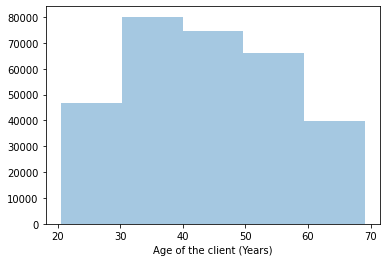

In [63]:
sns.distplot(train_df['DAYS_BIRTH']/-365,bins=5,kde=False)
plt.xlabel("Age of the client (Years)")
plt.show()

People in the age range of 30-40 are the most applicants, which seems normal

How many years it has been since applicants started working?
- DAYS_EMPLOYED colum values are negative because it's relative to the time of application

In [64]:
(train_df['DAYS_EMPLOYED']/365).describe()

count    307511.000000
mean        174.835742
std         387.056895
min         -49.073973
25%          -7.561644
50%          -3.323288
75%          -0.791781
max        1000.665753
Name: DAYS_EMPLOYED, dtype: float64

This data distribution doesn't seem to be correct, maximum value is 1000 and positive. Lets have a look at the data distribution-

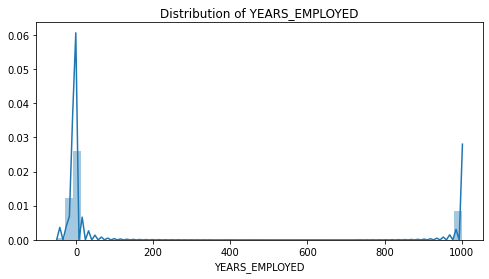

In [65]:
train_df['YEARS_EMPLOYED'] = train_df['DAYS_EMPLOYED']/365
plot_numerical(train_df, 'YEARS_EMPLOYED')

In [66]:
anomalies = train_df[(train_df['YEARS_EMPLOYED']>=900) & (train_df['YEARS_EMPLOYED']<=1100)]
print('Number of anomilies in DAYS_EMPLOYED: ' + str(len(anomalies)))
train_df = train_df.drop(columns=['YEARS_EMPLOYED'])

Number of anomilies in DAYS_EMPLOYED: 55374


- Lets look at their ability to repay

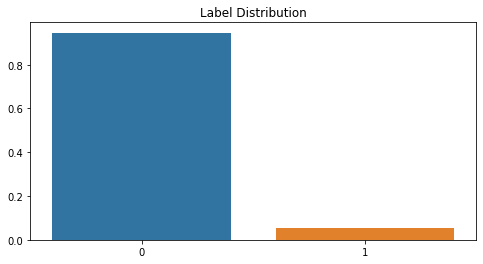

In [67]:
plot_categorical(anomalies, 'TARGET', xlabel_angle=0, title='Label Distribution')

Most of the anomolies were able to repay the load on time.

Here as anomiles are having same value, one approach is to impute all of them with same values and to specify if that value is for anomolieas or not. For this, we can impute the amonolies with NaN and then set a flag to specify if it is an anomoly or not.

In [68]:
# Create an anomalous flag column
train_df['DAYS_EMPLOYED_ANOM'] = train_df["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
train_df['DAYS_EMPLOYED'] = train_df['DAYS_EMPLOYED'].replace({365243: np.nan})

- Now if we look at the data distribution of Years of Employment then it looks normal

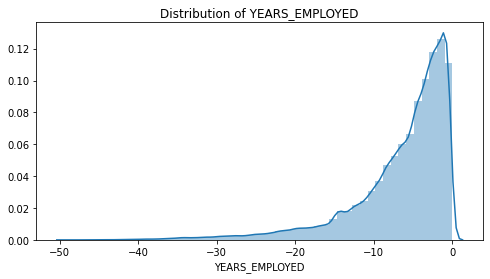

In [69]:
train_df['YEARS_EMPLOYED'] = train_df['DAYS_EMPLOYED']/365
plot_numerical(train_df, 'YEARS_EMPLOYED')

In [70]:
# Create an anomalous flag column
test_df['DAYS_EMPLOYED_ANOM'] = test_df["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
test_df['DAYS_EMPLOYED'] = test_df['DAYS_EMPLOYED'].replace({365243: np.nan})

EXT_SOURCE_3, EXT_SOURCE_2, EXT_SOURCE_1, DAYS_BIRTH are highly correlated. We would like to use these as interactio variables then keep the most correlated features for our feature engineering.